In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost  
from xgboost import XGBClassifier



In [2]:
df = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [3]:
test=pd.DataFrame(df)

In [4]:
display(test.head())
display(test.tail())


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
564                  0.07115          NaN  
565                  0.06637          NaN  
566                  0.07820          NaN  
567                  0.12400          NaN  
568                  0.07039          NaN  

[5 rows x 33 columns]

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
test.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [7]:
test.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
test.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
test_df_2=test.drop(['id','Unnamed: 32'],axis=1).T
test_df_2.head()

0       1       2      3       4      5       6      7    \
diagnosis            M       M       M      M       M      M       M      M   
radius_mean      17.99   20.57   19.69  11.42   20.29  12.45   18.25  13.71   
texture_mean     10.38   17.77   21.25  20.38   14.34   15.7   19.98  20.83   
perimeter_mean   122.8   132.9   130.0  77.58   135.1  82.57   119.6   90.2   
area_mean       1001.0  1326.0  1203.0  386.1  1297.0  477.1  1040.0  577.9   

                  8      9    ...    559    560    561    562     563     564  \
diagnosis           M      M  ...      B      B      B      M       M       M   
radius_mean      13.0  12.46  ...  11.51  14.05   11.2  15.22   20.92   21.56   
texture_mean    21.82  24.04  ...  23.93  27.15  29.37  30.62   25.09   22.39   
perimeter_mean   87.5  83.97  ...  74.52  91.38  70.67  103.4   143.0   142.0   
area_mean       519.8  475.9  ...  403.5  600.4  386.0  716.9  1347.0  1479.0   

                   565    566     567    568  
diagnosis            M      M       M      B  
radius_mean      20.13   16.6    20.6   7.76  
texture_mean     28.25  28.08   29.33  24.54  
perimeter_mean   131.2  108.3   140.1  47.92  
area_mean       1261.0  858.1  1265.0  181.0  

[5 rows x 569 columns]

In [10]:
test_data=test.drop(['id','Unnamed: 32'],axis=1)
test_data  

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

diagnosis radius_mean texture_mean perimeter_mean area_mean  \
0           M       17.99        10.38          122.8    1001.0   
1           M       20.57        17.77          132.9    1326.0   
2           M       19.69        21.25          130.0    1203.0   
3           M       11.42        20.38          77.58     386.1   
4           M       20.29        14.34          135.1    1297.0   
..        ...         ...          ...            ...       ...   
564         M       21.56        22.39          142.0    1479.0   
565         M       20.13        28.25          131.2    1261.0   
566         M        16.6        28.08          108.3     858.1   
567         M        20.6        29.33          140.1    1265.0   
568         B        7.76        24.54          47.92     181.0   

    smoothness_mean compactness_mean concavity_mean concave points_mean  \
0            0.1184           0.2776         0.3001              0.1471   
1           0.08474          0.07864         0.0869             0.07017   
2            0.1096           0.1599         0.1974              0.1279   
3            0.1425           0.2839         0.2414              0.1052   
4            0.1003           0.1328          0.198              0.1043   
..              ...              ...            ...                 ...   
564           0.111           0.1159         0.2439              0.1389   
565          0.0978           0.1034          0.144             0.09791   
566         0.08455           0.1023        0.09251             0.05302   
567          0.1178            0.277         0.3514               0.152   
568         0.05263          0.04362            0.0                 0.0   

    symmetry_mean fractal_dimension_mean  
0          0.2419                0.07871  
1          0.1812                0.05667  
2          0.2069                0.05999  
3          0.2597                0.09744  
4          0.1809                0.05883  
..            ...                    ...  
564        0.1726                0.05623  
565        0.1752                0.05533  
566         0.159                0.05648  
567        0.2397                0.07016  
568        0.1587                0.05884  

[569 rows x 11 columns]

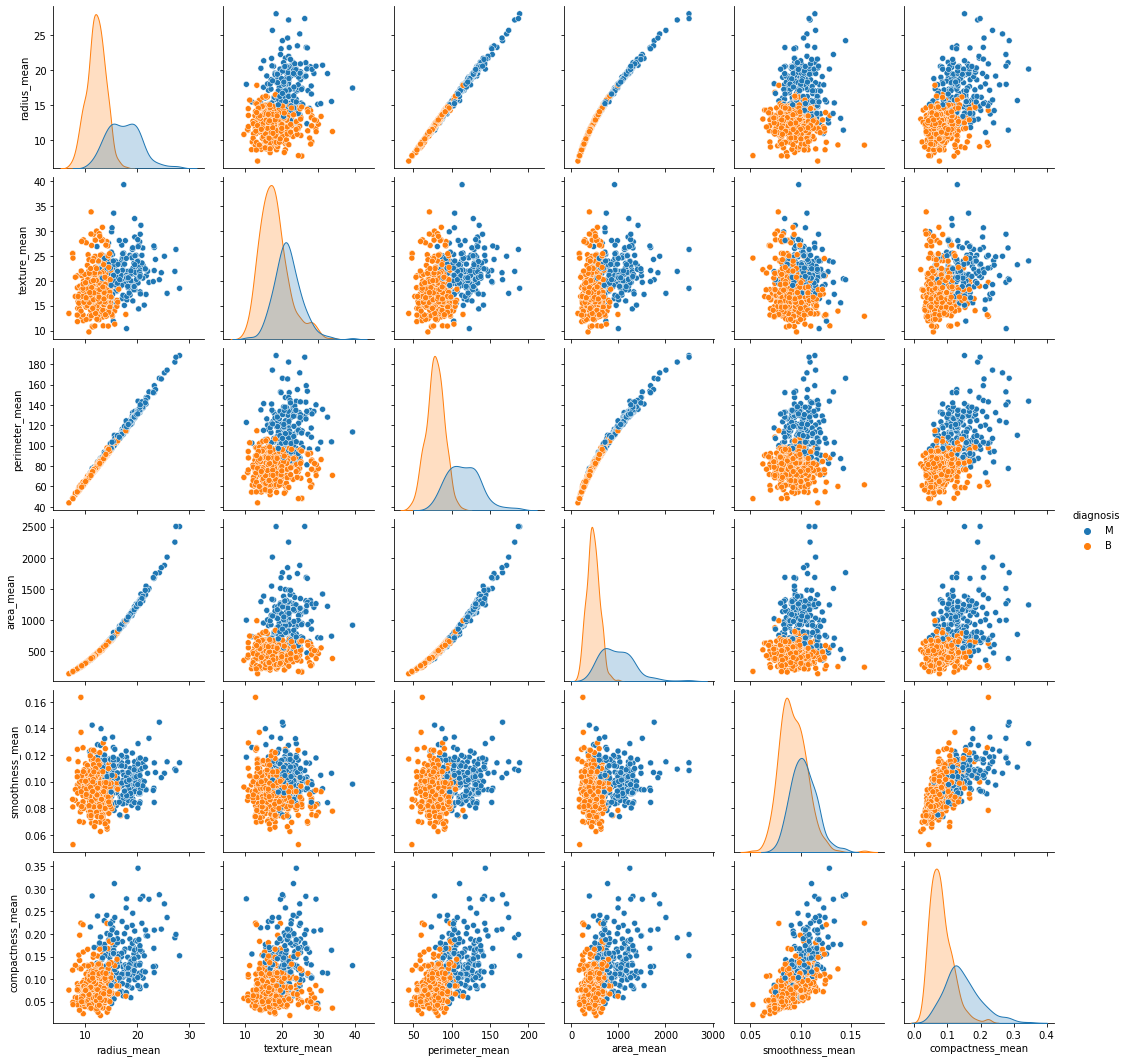

In [11]:
mean_data=test_data.drop([  'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst','concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],axis=1)
sns.pairplot(data=mean_data,hue='diagnosis')
mean_data=test_df_2.iloc[0:11].T
mean_data

radius_se texture_se perimeter_se area_se smoothness_se compactness_se  \
0       1.095     0.9053        8.589   153.4      0.006399        0.04904   
1      0.5435     0.7339        3.398   74.08      0.005225        0.01308   
2      0.7456     0.7869        4.585   94.03       0.00615        0.04006   
3      0.4956      1.156        3.445   27.23       0.00911        0.07458   
4      0.7572     0.7813        5.438   94.44       0.01149        0.02461   
..        ...        ...          ...     ...           ...            ...   
564     1.176      1.256        7.673   158.7        0.0103        0.02891   
565    0.7655      2.463        5.203   99.04      0.005769        0.02423   
566    0.4564      1.075        3.425   48.55      0.005903        0.03731   
567     0.726      1.595        5.772   86.22      0.006522        0.06158   
568    0.3857      1.428        2.548   19.15      0.007189        0.00466   

    concavity_se concave points_se symmetry_se fractal_dimension_se  
0        0.05373           0.01587     0.03003             0.006193  
1         0.0186            0.0134     0.01389             0.003532  
2        0.03832           0.02058      0.0225             0.004571  
3        0.05661           0.01867     0.05963             0.009208  
4        0.05688           0.01885     0.01756             0.005115  
..           ...               ...         ...                  ...  
564      0.05198           0.02454     0.01114             0.004239  
565       0.0395           0.01678     0.01898             0.002498  
566       0.0473           0.01557     0.01318             0.003892  
567      0.07117           0.01664     0.02324             0.006185  
568          0.0               0.0     0.02676             0.002783  

[569 rows x 10 columns]

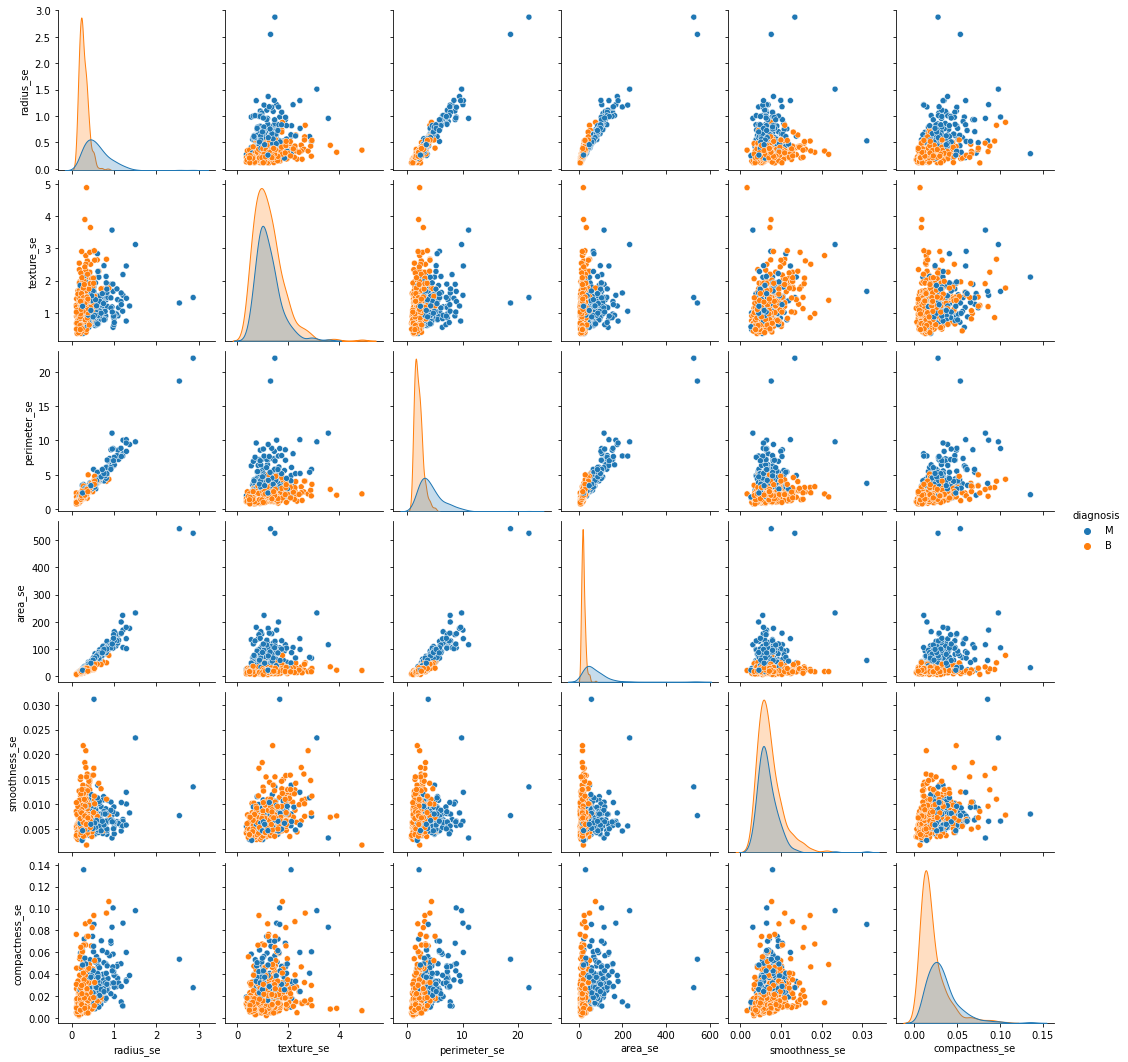

In [12]:
se_data=test_data.drop([ 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean','radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst','concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'],axis=1)
sns.pairplot(data=se_data,hue='diagnosis')
se_data=test_df_2.iloc[11:21].T
se_data

radius_worst texture_worst perimeter_worst area_worst smoothness_worst  \
0          25.38         17.33           184.6     2019.0           0.1622   
1          24.99         23.41           158.8     1956.0           0.1238   
2          23.57         25.53           152.5     1709.0           0.1444   
3          14.91          26.5           98.87      567.7           0.2098   
4          22.54         16.67           152.2     1575.0           0.1374   
..           ...           ...             ...        ...              ...   
564        25.45          26.4           166.1     2027.0            0.141   
565        23.69         38.25           155.0     1731.0           0.1166   
566        18.98         34.12           126.7     1124.0           0.1139   
567        25.74         39.42           184.6     1821.0            0.165   
568        9.456         30.37           59.16      268.6          0.08996   

    compactness_worst concavity_worst concave points_worst symmetry_worst  \
0              0.6656          0.7119               0.2654         0.4601   
1              0.1866          0.2416                0.186          0.275   
2              0.4245          0.4504                0.243         0.3613   
3              0.8663          0.6869               0.2575         0.6638   
4               0.205             0.4               0.1625         0.2364   
..                ...             ...                  ...            ...   
564            0.2113          0.4107               0.2216          0.206   
565            0.1922          0.3215               0.1628         0.2572   
566            0.3094          0.3403               0.1418         0.2218   
567            0.8681          0.9387                0.265         0.4087   
568           0.06444             0.0                  0.0         0.2871   

    fractal_dimension_worst  
0                    0.1189  
1                   0.08902  
2                   0.08758  
3                     0.173  
4                   0.07678  
..                      ...  
564                 0.07115  
565                 0.06637  
566                  0.0782  
567                   0.124  
568                 0.07039  

[569 rows x 10 columns]

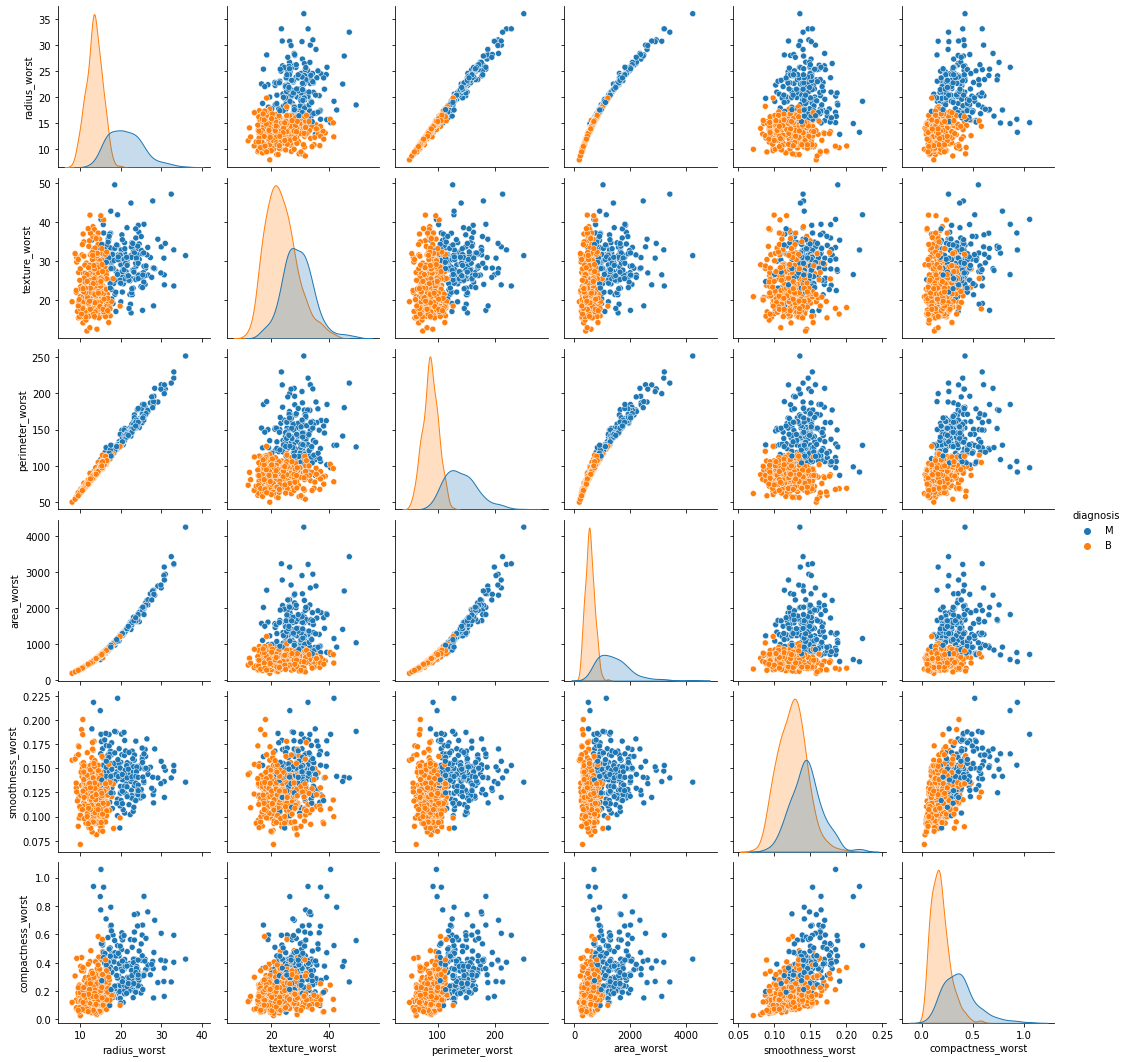

In [13]:
worst_data=test_data.drop([ 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se','concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],axis=1)
sns.pairplot(data=worst_data,hue='diagnosis')
worst_data=test_df_2.iloc[21:31].T
worst_data

In [14]:
test_data.shape

(569, 31)

In [15]:
corr=test_data.corr()
corr

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_se                 -0.097317      0.386358       -0.086761  -0.066280   
perimeter_se                0.674172      0.281673        0.693135   0.726628   
area_se                     0.735864      0.259845        0.744983   0.800086   
smoothness_se              -0.222600      0.006614       -0.202694  -0.166777   
compactness_se              0.206000      0.191975        0.250744   0.212583   
concavity_se                0.194204      0.143293        0.228082   0.207660   
concave points_se           0.376169      0.163851        0.407217   0.372320   
symmetry_se                -0.104321      0.009127       -0.081629  -0.072497   
fractal_dimension_se       -0.042641      0.054458       -0.005523  -0.019887   
radius_worst                0.969539      0.352573        0.969476   0.962746   
texture_worst               0.297008      0.912045        0.303038   0.287489   
perimeter_worst             0.965137      0.358040        0.970387   0.959120   
area_worst                  0.941082      0.343546        0.941550   0.959213   
smoothness_worst            0.119616      0.077503        0.150549   0.123523   
compactness_worst           0.413463      0.277830        0.455774   0.390410   
concavity_worst             0.526911      0.301025        0.563879   0.512606   
concave points_worst        0.744214      0.295316        0.771241   0.722017   
symmetry_worst              0.163953      0.105008        0.189115   0.143570   
fractal_dimension_worst     0.007066      0.119205        0.051019   0.003738   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                     0.170581          0.506124        0.676764   
texture_mean                   -0.023389          0.236702        0.302418   
perimeter_mean                  0.207278          0.556936        0.716136   
area_mean                       0.177028          0.498502        0.685983   
smoothness_mean                 1.000000          0.659123        0.521984   
compactness_mean                0.659123          1.000000        0.883121   
concavity_mean                  0.521984          0.883121        1.000000   
concave points_mean             0.553695          0.831135        0.921391   
symmetry_mean                   0.557775          0.602641        0.500667   
fractal_dimension_mean          0.584792          0.565369        0.336783   
radius_se                       0.301467          0.497473        0.631925   
texture_se                      0.068406          0.046205        0.076218   
perimeter_se                    0.296092          0.548905        0.660391   
area_se                         0.246552          0.455653        0.617427   
smoothness_se                   0.332375          0.135299        0.098564   
compactness_se                  0.318943          0.738722        0.670279   
concavity_se                    0.248396          0.570517        0.691270   
concave points_se               0.380676          0.642262        0.683260   
symmetry_se                    

In [16]:
dummy_df=pd.get_dummies(test_data,drop_first=True)
dummy_df.rename({'diagnosis_M':'diagnosis'},axis=1,inplace=True)
dummy_df

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  diagnosis  
0                  0.2654          0.4601                  0.11890          1  
1                  0.1860          0.2750                  0.08902          1  
2                  0.2430          0.3613                  0.08758          1  
3                  0.2575          0.6638                  0.17300          1  
4                  0.1625          0.2364        

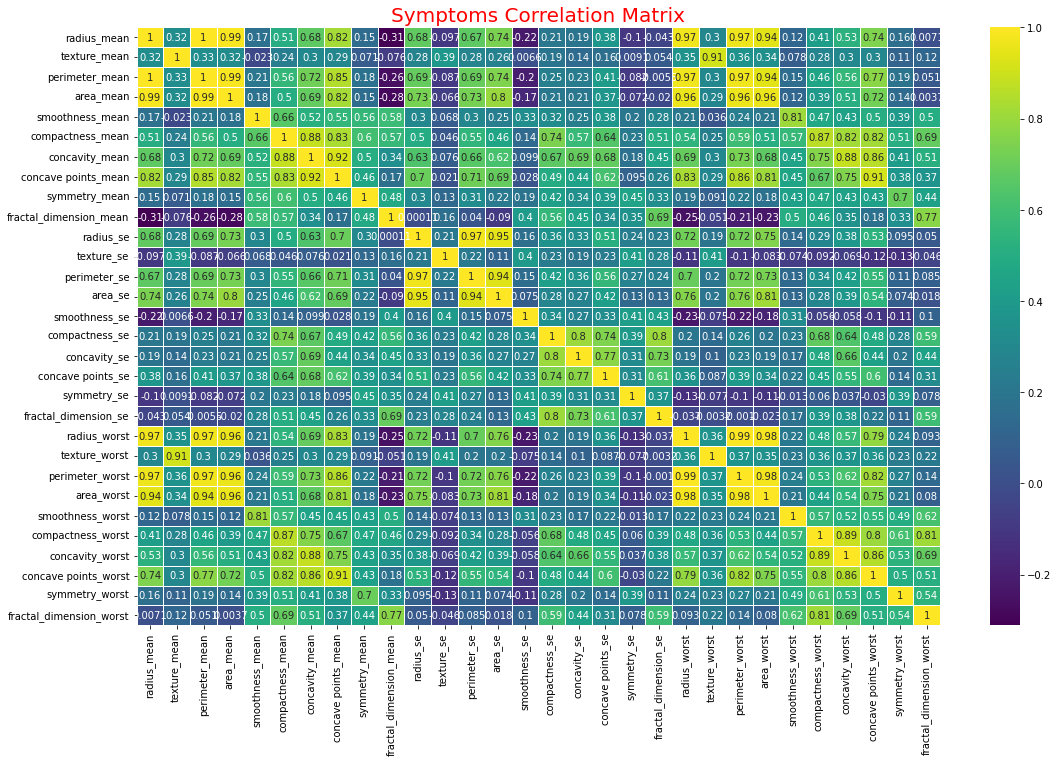

In [17]:
plt.figure(figsize=(18,11))
sns.heatmap(corr,cmap='viridis',annot=True,linewidths=0.5)
plt.title("Symptoms Correlation Matrix",c='r',fontsize=20)
plt.show()

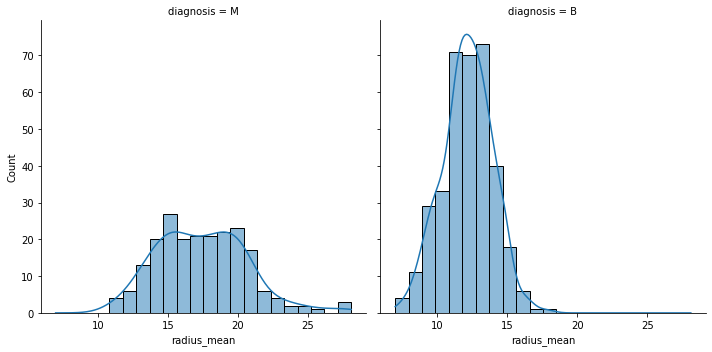

In [18]:
sns.displot(data=test,x='radius_mean',col='diagnosis',kde=True)

alt.Chart(...)

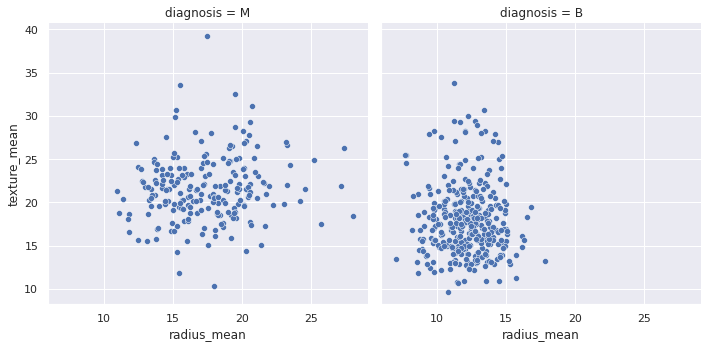

In [19]:
sns.set_theme()
sns.relplot(data=test_data,
            x='radius_mean',y='texture_mean',col='diagnosis',
            )
alt.Chart(test_data).mark_bar().encode(
    x=alt.X('radius_mean',bin=True),
    y='texture_mean',
    color='diagnosis'
    )





alt.Chart(...)

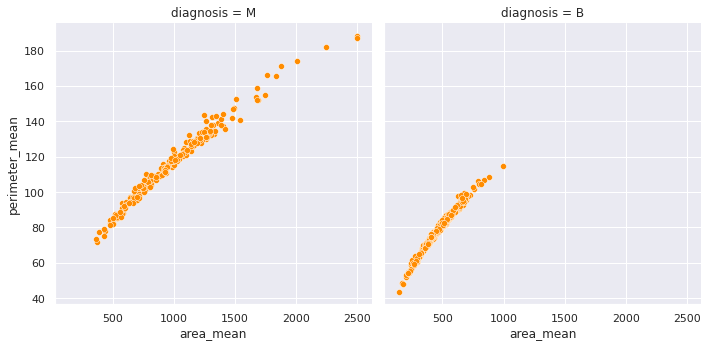

In [20]:
sns.relplot(data=test_data,
            x='area_mean',y='perimeter_mean',col='diagnosis',
            color = 'darkorange')
alt.Chart(test_data).mark_bar().encode(
    x=alt.X('area_mean',bin=True),
    y='perimeter_mean',
    color='diagnosis'
    )

alt.Chart(...)

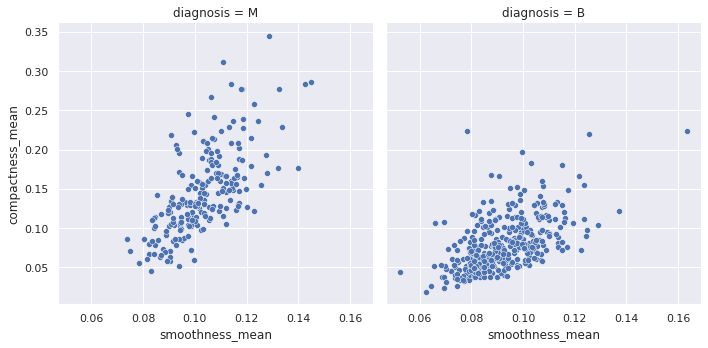

In [21]:

sns.relplot(data=test_data,x='smoothness_mean',y='compactness_mean',col='diagnosis')
alt.Chart(test_data).mark_bar().encode(
    x=alt.X('smoothness_mean',bin=True),
    y='compactness_mean',
    color='diagnosis'
    )

alt.Chart(...)

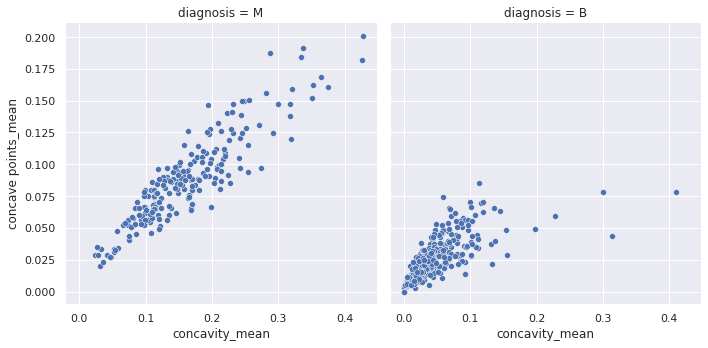

In [22]:
sns.relplot(data=test_data, x='concavity_mean',y='concave points_mean',col='diagnosis')
alt.Chart(test_data).mark_bar().encode(
    x=alt.X('concavity_mean',bin=True),
    y='concave points_mean',
    color='diagnosis'
    )

alt.Chart(...)

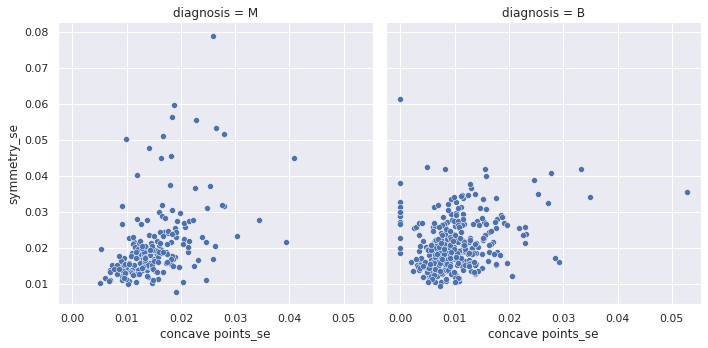

In [23]:
sns.relplot(data=test_data,
            x='concave points_se',y='symmetry_se',col='diagnosis'
            )
alt.Chart(test_data).mark_bar().encode(
    x=alt.X('concave points_se',bin=True),
    y='symmetry_se',
    color='diagnosis'
    )


alt.Chart(...)

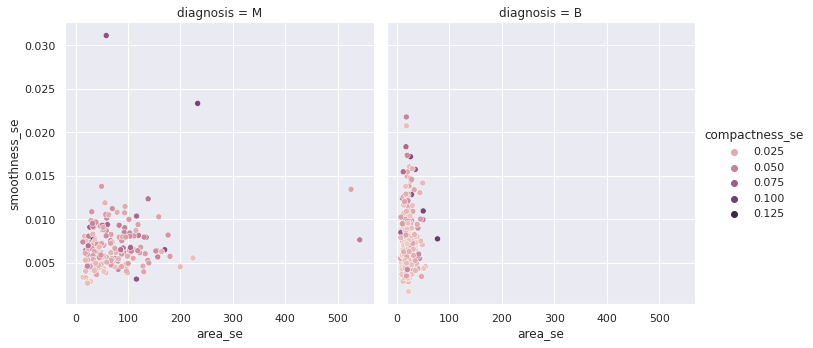

In [24]:
sns.relplot(data=test_data,
            x='area_se',y='smoothness_se',col='diagnosis',hue='compactness_se',color='r'
            )

alt.Chart(test_data).mark_bar().encode(
    x=alt.X('area_se',bin=True),
    y='smoothness_se',
    color='diagnosis'
    )

alt.Chart(...)

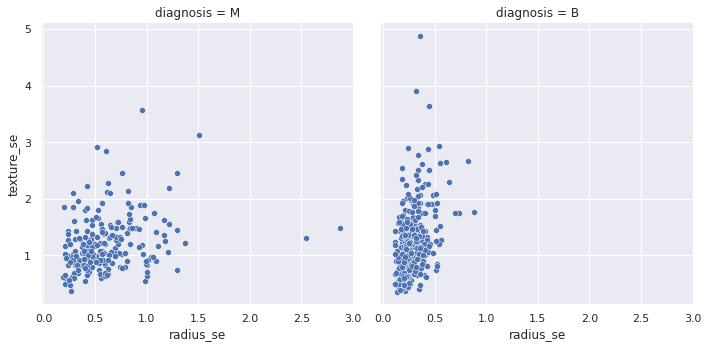

In [25]:

sns.relplot(data=test_data, x='radius_se',y='texture_se',col='diagnosis'
            )
alt.Chart(test_data).mark_bar().encode(
    x=alt.X('radius_se',bin=True),
    y='texture_se',
    color='diagnosis'
    )



alt.Chart(...)

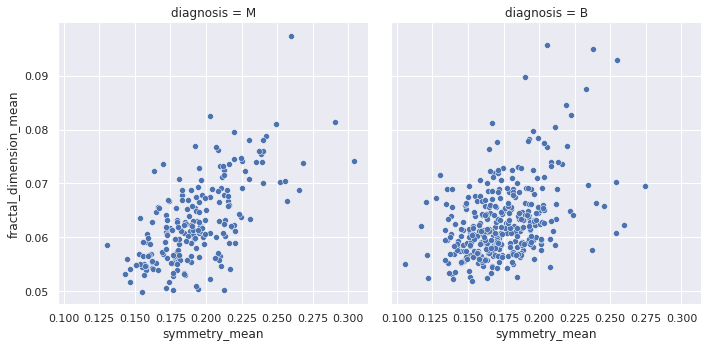

In [26]:
sns.relplot(data=test_data,x='symmetry_mean',y='fractal_dimension_mean',col='diagnosis')
alt.Chart(test_data).mark_bar().encode(
    x=alt.X('symmetry_mean',bin=True),
    y='fractal_dimension_mean',
    color='diagnosis'
    )

alt.Chart(...)

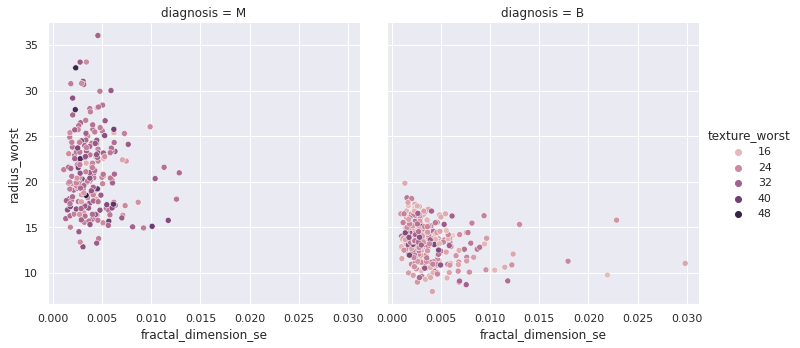

In [27]:
sns.relplot(data=test_data,
            x='fractal_dimension_se',y='radius_worst',col='diagnosis',hue='texture_worst'
            )
alt.Chart(test_data).mark_bar().encode(
    x=alt.X('fractal_dimension_se',bin=True),
    y='radius_worst',
    color='diagnosis'
    )



alt.Chart(...)

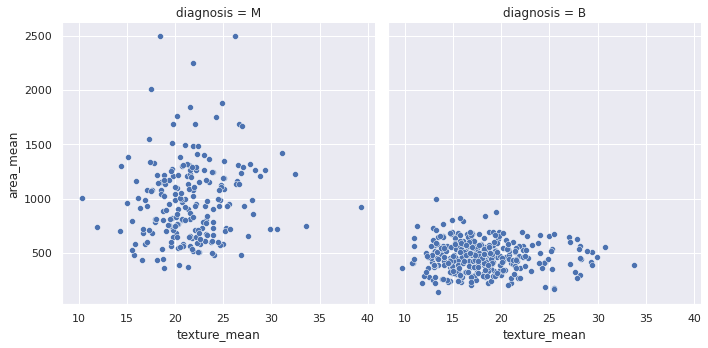

In [28]:
sns.relplot(data=test_data,x='texture_mean',y='area_mean',col='diagnosis')
alt.Chart(test_data).mark_bar().encode(
    x=alt.X('texture_mean',bin=True),
    y='area_mean',
    color='diagnosis'
    )

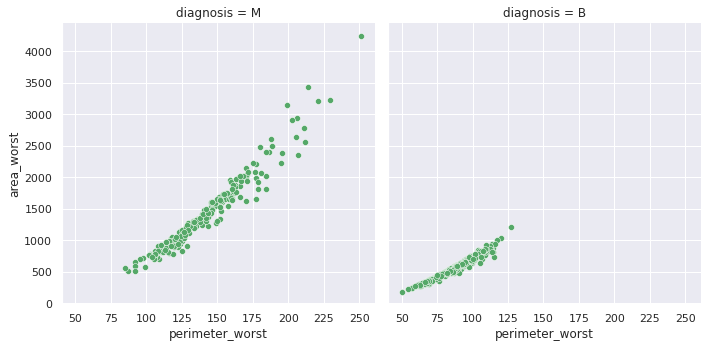

In [29]:
alt.Chart(test_data).mark_bar().encode(
    x=alt.X('perimeter_worst',bin=True),
    y='area_worst',
    color='diagnosis'
    )
sns.relplot(data=test_data,
            x='perimeter_worst',y='area_worst',col='diagnosis',color='g'
            )

#                                Split test,train data

In [30]:
x = test_data.drop(['diagnosis'], axis = 1)
x.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [31]:
y = dummy_df['diagnosis']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: uint8

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=20)

# Supervised Learning with Support Vector Machine

In [33]:
svc_clr = svm.SVC(kernel='linear')
svc_clr.fit(X_train, y_train)
y_pred_scv = svc_clr.predict(X_test)
accuracy_score(y_test, y_pred_scv)

0.956140350877193

In [34]:
print(classification_report(y_test, y_pred_scv))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        66
           1       0.96      0.94      0.95        48

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# Feature scaling

In [35]:

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# ****Train with Standard scaled Data****

In [36]:
svc_clr2 = SVC()
svc_clr2.fit(X_train_sc, y_train)
y_pred_svc_sc = svc_clr2.predict(X_test_sc)
accuracy_score(y_test, y_pred_svc_sc)

0.9912280701754386

In [37]:
print(classification_report(y_test, y_pred_svc_sc))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        66
           1       1.00      0.98      0.99        48

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



# ****Decision Tree Classifier****

In [38]:
dt_clr = DecisionTreeClassifier(criterion = 'entropy', random_state = 20)
dt_clr.fit(X_train, y_train)
y_pred_dt = dt_clr.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.956140350877193

In [39]:
print(classification_report(y_test, y_pred_dt))


              precision    recall  f1-score   support

           0       0.97      0.95      0.96        66
           1       0.94      0.96      0.95        48

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



# ****Random Forest Classifier****

In [40]:
rf_clr = RandomForestClassifier(criterion = 'entropy', random_state = 51)
rf_clr.fit(X_train, y_train)
y_pred_rf = rf_clr.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.9649122807017544

In [41]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        66
           1       1.00      0.92      0.96        48

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# ****XGBoost Classifier****

In [42]:

xgb_clr = XGBClassifier()
xgb_clr.fit(X_train, y_train)
y_pred_xgb = xgb_clr.predict(X_test)
accuracy_score(y_test, y_pred_xgb)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:37:24] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9912280701754386

In [43]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred=y_pred_xgb))
print("precision:",metrics.precision_score(y_test,y_pred=y_pred_xgb))

accuracy: 0.9912280701754386
precision: 1.0


In [44]:

print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        66
           1       1.00      0.98      0.99        48

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



              precision    recall  f1-score   support

           0       0.99      1.00      0.99        66
           1       1.00      0.98      0.99        48

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



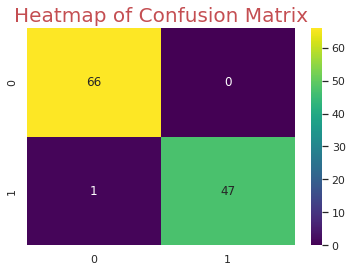

In [45]:
print(classification_report(y_test, y_pred_xgb))
confusion_matrix = confusion_matrix(y_test, y_pred_xgb)
plt.title('Heatmap of Confusion Matrix', fontsize = 20,c='r')
sns.heatmap(confusion_matrix, annot = True,cmap='viridis')
plt.show()
